In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import urllib.request
from zipfile import ZipFile

In [5]:
# The URL to the MovieLens 
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_path = "ml-100k/"

# Download file
print("\nDownloading MovieLens dataset...")
urllib.request.urlretrieve(url, zip_path)
print("Download complete.")

# Unzip file
print("Unzipping the file...")
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
print("Unzipping complete.")

# Clean downloaded zip file
os.remove(zip_path)
print(f"\nData is now available in the '{data_path}' directory.")


Download complete.
Unzipping the file...
Unzipping complete.

Data is now available in the 'ml-100k/' directory.


In [7]:
 column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Load u.data file
try:
    ratings_df = pd.read_csv(
        os.path.join(data_path, 'u.data'),
        sep='\t',
        names=column_names,
        engine='python' 
    )
    print("Ratings data loaded successfully.")

    print("\nFirst 5 rows of the ratings DataFrame:")
    print(ratings_df.head())

    print(f"\nShape of the ratings DataFrame: {ratings_df.shape}")

except FileNotFoundError:
    print(f"Error: The file 'u.data' was not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation script.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")


Ratings data loaded successfully.

First 5 rows of the ratings DataFrame:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Shape of the ratings DataFrame: (100000, 4)


In [9]:
print("\n--- DataFrame Info ---")
ratings_df.info()

print("\n--- Missing Values ---")
print(ratings_df.isnull().sum())

print("\n--- Rating Statistics ---")
print(ratings_df['rating'].describe())

print("\n--- Unique Users and Movies ---")
num_users = ratings_df['user_id'].nunique()
num_items = ratings_df['item_id'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_items}")

# Drop the 'timestamp' column
ratings_df = ratings_df.drop('timestamp', axis=1)
print("\n'timestamp' column dropped.")


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

--- Missing Values ---
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

--- Rating Statistics ---
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

--- Unique Users and Movies ---
Number of unique users: 943
Number of unique movies: 1682

'timestamp' column dropped.


In [11]:
# Load the movies data
print("Loading movies data...")
movie_column_names = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
                      'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
                      'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                      'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
try:
    movies_df = pd.read_csv(
        os.path.join(data_path, 'u.item'),
        sep='|',
        names=movie_column_names,
        encoding='latin-1',
        engine='python'
    )
    print("Movies data loaded successfully.")
    print("\nFirst 5 rows of the movies DataFrame:")
    print(movies_df.head())
    print(f"\nShape of the movies DataFrame: {movies_df.shape}")

    # Drop unnecessary columns
    movies_df = movies_df.drop(columns=['release_date', 'video_release_date', 'IMDb_URL', 'unknown'])
    print("\nUnnecessary movie columns dropped.")

    print("\n--- Movies DataFrame Info ---")
    movies_df.info()

except FileNotFoundError:
    print(f"Error: The file 'u.item' was not found in the '{data_path}' directory. "
          "Please ensure you have run the previous scripts.")
except Exception as e:
    print(f"An error occurred while loading movie data: {e}")

# Load the users data
print("\nLoading users data...")
user_column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
try:
    users_df = pd.read_csv(
        os.path.join(data_path, 'u.user'),
        sep='|',
        names=user_column_names,
        engine='python'
    )
    print("Users data loaded successfully.")
    print("\nFirst 5 rows of the users DataFrame:")
    print(users_df.head())
    print(f"\nShape of the users DataFrame: {users_df.shape}")

    # Drop unnecessary columns
    users_df = users_df.drop('zip_code', axis=1)
    print("\n'zip_code' column dropped.")

    print("\n--- Users DataFrame Info ---")
    users_df.info()

except FileNotFoundError:
    print(f"Error: The file 'u.user' was not found in the '{data_path}' directory. "
          "Please ensure you have run the previous scripts.")
except Exception as e:
    print(f"An error occurred while loading user data: {e}")


Loading movies data...
Movies data loaded successfully.

First 5 rows of the movies DataFrame:
   item_id              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror 

In [13]:
# Define column names 
ratings_column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movie_column_names = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
                      'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
                      'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                      'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
user_column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

try:
    # Load the DataFrames
    ratings_df = pd.read_csv(os.path.join(data_path, 'u.data'), sep='\t', names=ratings_column_names, engine='python')
    movies_df = pd.read_csv(os.path.join(data_path, 'u.item'), sep='|', names=movie_column_names, encoding='latin-1', engine='python')
    users_df = pd.read_csv(os.path.join(data_path, 'u.user'), sep='|', names=user_column_names, engine='python')

    # Drop unnecessary columns
    ratings_df = ratings_df.drop('timestamp', axis=1)
    movies_df = movies_df.drop(columns=['release_date', 'video_release_date', 'IMDb_URL', 'unknown'])
    users_df = users_df.drop('zip_code', axis=1)

    # Merge DataFrames
    print("Merging dataframes...")
    full_df = pd.merge(ratings_df, users_df, on='user_id')
    full_df = pd.merge(full_df, movies_df, on='item_id')
    print("Dataframes merged successfully.")
    print("\nFirst 5 rows of the merged DataFrame:")
    print(full_df.head())

    # Display merged DataFrame
    print("\n--- Full DataFrame Info ---")
    full_df.info()

except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation script.")
except Exception as e:
    print(f"An error occurred while merging the data: {e}")


Merging dataframes...
Dataframes merged successfully.

First 5 rows of the merged DataFrame:
   user_id  item_id  rating  age gender  occupation  \
0      196      242       3   49      M      writer   
1      186      302       3   39      F   executive   
2       22      377       1   25      M      writer   
3      244       51       2   28      M  technician   
4      166      346       1   47      M    educator   

                        title  Action  Adventure  Animation  ...  Fantasy  \
0                Kolya (1996)       0          0          0  ...        0   
1    L.A. Confidential (1997)       0          0          0  ...        0   
2         Heavyweights (1994)       0          0          0  ...        0   
3  Legends of the Fall (1994)       0          0          0  ...        0   
4         Jackie Brown (1997)       0          0          0  ...        0   

   Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0          0       0        0        0 

Dataframes merged and ready for analysis.

Plotting ratings distribution...


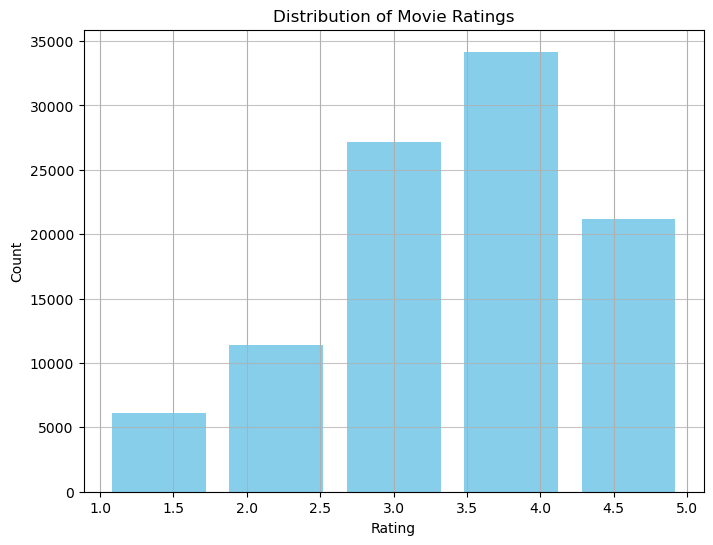


Plotting top 10 most rated movies...


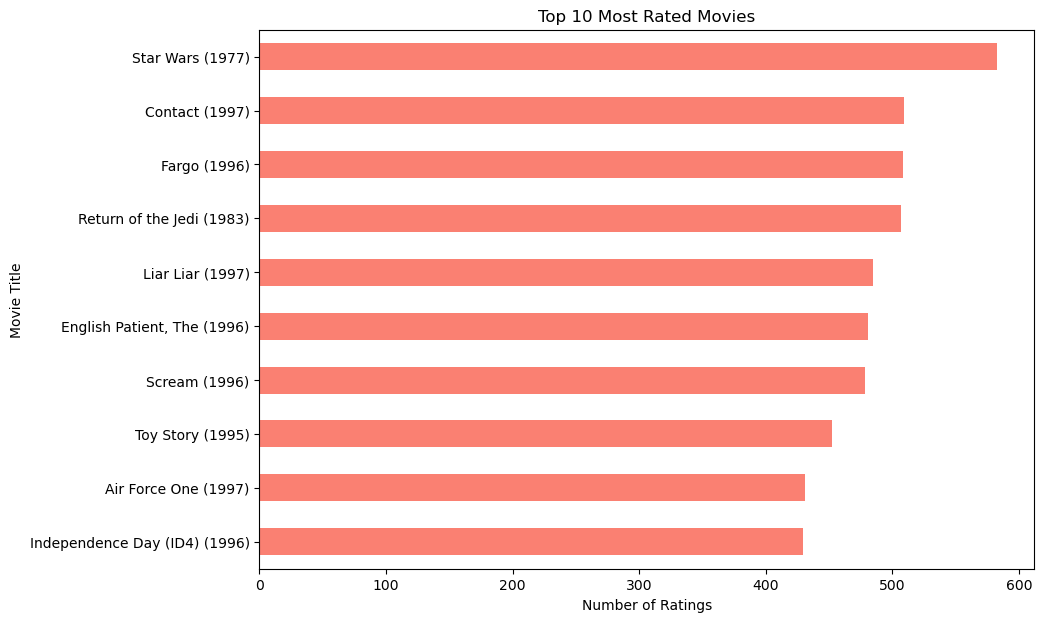


Plotting user demographics...


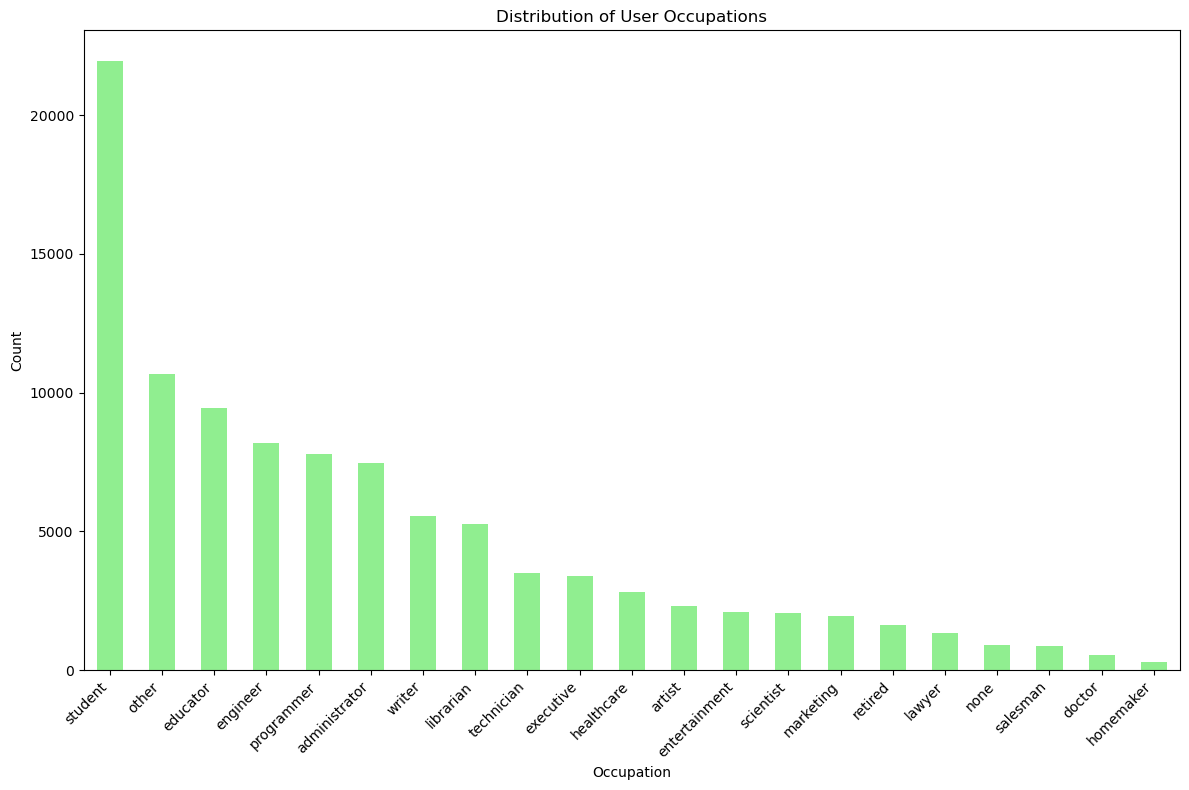

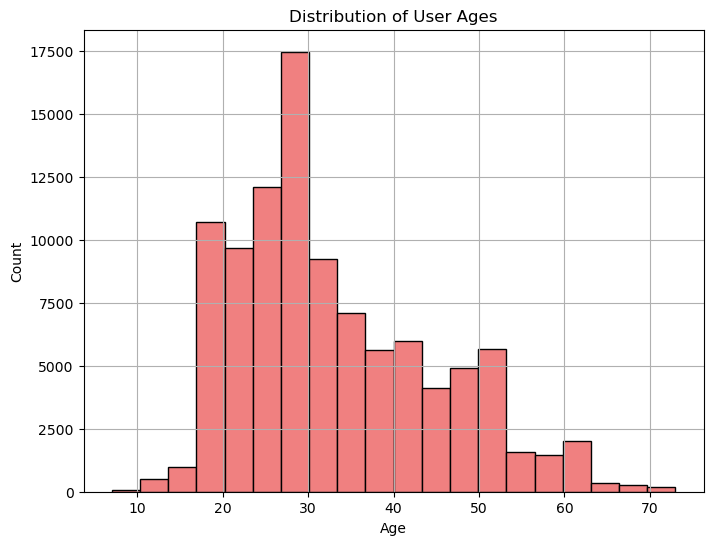


Exploratory Data Analysis complete.


In [17]:
ratings_column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movie_column_names = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
                      'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
                      'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                      'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
user_column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

try:
    ratings_df = pd.read_csv(os.path.join(data_path, 'u.data'), sep='\t', names=ratings_column_names, engine='python')
    movies_df = pd.read_csv(os.path.join(data_path, 'u.item'), sep='|', names=movie_column_names, encoding='latin-1', engine='python')
    users_df = pd.read_csv(os.path.join(data_path, 'u.user'), sep='|', names=user_column_names, engine='python')
    
    # Drop unnecessary columns
    ratings_df = ratings_df.drop('timestamp', axis=1)
    movies_df = movies_df.drop(columns=['release_date', 'video_release_date', 'IMDb_URL', 'unknown'])
    users_df = users_df.drop('zip_code', axis=1)

    # Merge dataFrames
    full_df = pd.merge(pd.merge(ratings_df, users_df, on='user_id'), movies_df, on='item_id')

    print("Dataframes merged and ready for analysis.")

    print("\nPlotting ratings distribution...")
    plt.figure(figsize=(8, 6))
    full_df['rating'].hist(bins=5, rwidth=0.8, color='skyblue')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print("\nPlotting top 10 most rated movies...")
    top_10_movies = full_df['title'].value_counts().head(10)
    plt.figure(figsize=(10, 7))
    top_10_movies.plot(kind='barh', color='salmon')
    plt.title('Top 10 Most Rated Movies')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Movie Title')
    plt.gca().invert_yaxis() # To show the highest rating at the top
    plt.show()

    print("\nPlotting user demographics...")
    # Plotting occupation distribution
    plt.figure(figsize=(12, 8))
    full_df['occupation'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title('Distribution of User Occupations')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    full_df['age'].hist(bins=20, color='lightcoral', edgecolor='black')
    plt.title('Distribution of User Ages')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    print("\nExploratory Data Analysis complete.")

except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
    print(f"An error occurred during EDA: {e}")


In [19]:
# User-item matrix
try:
   user_item_matrix = full_df.pivot_table(index='user_id', columns='title', values='rating')
   user_item_matrix = user_item_matrix.fillna(0)
   print("\nUser-Item Matrix created successfully.")
   print("Shape of the matrix (users x movies):", user_item_matrix.shape)
    
   print("\nFirst 5 rows of the User-Item Matrix:")
   print(user_item_matrix.head())

except FileNotFoundError:
   print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
   print(f"An error occurred while creating the user-item matrix: {e}")



User-Item Matrix created successfully.
Shape of the matrix (users x movies): (943, 1664)

First 5 rows of the User-Item Matrix:
title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              0.0           0.0                    2.0   
2                              0.0           0.0                    0.0   
3                              0.0           0.0                    0.0   
4                              0.0           0.0                    0.0   
5                              0.0           0.0                    2.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         0.0                          0.0   
2                        0.0         0.0                          0.0   
3                        0.0         2.0             

In [21]:
# The user-item matrix 
try:
    user_item_matrix = full_df.pivot_table(index='user_id', columns='title', values='rating').fillna(0)

    print("\nCalculating user similarity matrix...")
    user_similarity = cosine_similarity(user_item_matrix)

    # To make it easier to interpret, we convert the numpy array to a pandas DataFrame
    user_similarity_df = pd.DataFrame(user_similarity, 
                                      index=user_item_matrix.index, 
                                      columns=user_item_matrix.index)

    print("User similarity matrix created successfully.")
    print(user_similarity_df.iloc[:5, :5])

except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
    print(f"An error occurred while calculating user similarity: {e}")



Calculating user similarity matrix...
User similarity matrix created successfully.
user_id         1         2         3         4         5
user_id                                                  
1        1.000000  0.168937  0.048388  0.064561  0.379670
2        0.168937  1.000000  0.113393  0.179694  0.073623
3        0.048388  0.113393  1.000000  0.349781  0.021592
4        0.064561  0.179694  0.349781  1.000000  0.031804
5        0.379670  0.073623  0.021592  0.031804  1.000000


In [23]:
try:
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, 
                                      index=user_item_matrix.index, 
                                      columns=user_item_matrix.index)
   
    def get_recommendations(user_id, num_recommendations=5):
        print(f"\nFinding recommendations for User {user_id}...")
        
        user_similarities = user_similarity_df[user_id].sort_values(ascending=False)
        similar_users = user_similarities.index[1:11] 
        similar_users_movies = user_item_matrix.loc[similar_users]
        user_movies = user_item_matrix.loc[user_id]
        unseen_movies = user_movies[user_movies == 0].index
        recommended_movies = similar_users_movies[unseen_movies].sum().sort_values(ascending=False)
        final_recommendations = recommended_movies.head(num_recommendations)
        
        print(f"Top {num_recommendations} recommendations for User {user_id}:")
        return pd.DataFrame({'Movie Title': final_recommendations.index, 'Predicted Score': final_recommendations.values})
    
    recommended_movies = get_recommendations(user_id=25, num_recommendations=10)
    print(recommended_movies)

except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
    print(f"An error occurred: {e}")



Finding recommendations for User 25...
Top 10 recommendations for User 25:
                              Movie Title  Predicted Score
0                     Blade Runner (1982)             42.0
1         Empire Strikes Back, The (1980)             42.0
2       Terminator 2: Judgment Day (1991)             41.0
3          When Harry Met Sally... (1989)             41.0
4                      Rear Window (1954)             40.0
5            It's a Wonderful Life (1946)             37.0
6                     Pulp Fiction (1994)             36.0
7  Monty Python and the Holy Grail (1974)             36.0
8                          Amadeus (1984)             36.0
9                       Unforgiven (1992)             35.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Preduction function
try:
    train_data, test_data = train_test_split(full_df, test_size=0.20, random_state=42)
    # SVD Model Building 
    train_user_item_matrix = train_data.pivot_table(index='user_id', columns='title', values='rating')
    
    users = list(train_user_item_matrix.index)
    movies = list(train_user_item_matrix.columns)

    user_to_index = {user: i for i, user in enumerate(users)}
    movie_to_index = {movie: i for i, movie in enumerate(movies)}

    # Global mean, user biases, and item biases
    global_mean = train_data['rating'].mean()
    user_biases = train_data.groupby('user_id')['rating'].mean() - global_mean
    movie_biases = train_data.groupby('title')['rating'].mean() - global_mean

    # Fill NaN values 
    rating_matrix = train_user_item_matrix.fillna(0).values
    
    print("\nStarting SVD decomposition with biases. This may take a moment...")
    
    # SVD
    U, sigma, Vt = np.linalg.svd(rating_matrix, full_matrices=False)
    sigma = np.diag(sigma)
    
    k = 50
    U_k = U[:, :k]
    sigma_k = sigma[:k, :k]
    Vt_k = Vt[:k, :]
    
    # Prediction and Evaluation
    print("\nStarting model evaluation on test data...")
    actual_ratings = []
    predicted_ratings = []

    for index, row in test_data.iterrows():
        user_id = row['user_id']
        movie_title = row['title']
        actual_rating = row['rating']

        if user_id in user_to_index and movie_title in movie_to_index:
            user_idx = user_to_index[user_id]
            movie_idx = movie_to_index[movie_title]

            predicted_rating = global_mean + user_biases.get(user_id, 0) + movie_biases.get(movie_title, 0) + \
                               np.dot(np.dot(U_k[user_idx, :], sigma_k), Vt_k[:, movie_idx])
            predicted_rating = np.clip(predicted_rating, 1, 5)

            actual_ratings.append(actual_rating)
            predicted_ratings.append(predicted_rating)
        
    # MAE and RMSE
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    
    print("\n SVD Model Performance Metrics")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
    print(f"An error occurred: {e}")

    


Starting SVD decomposition with biases. This may take a moment...

Starting model evaluation on test data...

 SVD Model Performance Metrics
Mean Absolute Error (MAE): 0.9574
Root Mean Squared Error (RMSE): 1.2454


In [39]:
# Recommendation Function
try:
     def recommend_movies_svd(user_id, num_recommendations=10):
        if user_id not in user_to_index:
            print(f"User {user_id} not found in the training set.")
            return []
        
        user_idx = user_to_index[user_id]
        rated_movies = train_data[train_data['user_id'] == user_id]['title'].values     
        predictions = {}
        
        for movie_title in movies:
            if movie_title not in rated_movies:
                movie_idx = movie_to_index[movie_title]
                predicted_rating = global_mean + user_biases.get(user_id, 0) + movie_biases.get(movie_title, 0) + \
                                   np.dot(np.dot(U_k[user_idx, :], sigma_k), Vt_k[:, movie_idx])
                predictions[movie_title] = predicted_rating
        
        recommended_movies = sorted(predictions.items(), key=lambda item: item[1], reverse=True)
        top_recommendations = [movie for movie, score in recommended_movies[:num_recommendations]]
        
        return top_recommendations

     user_id_to_recommend = 87
     recommended_movies = recommend_movies_svd(user_id_to_recommend, num_recommendations=5)
    
     print(f"\nTop 5 movie recommendations for User {user_id_to_recommend}:")
     for i, movie in enumerate(recommended_movies):
        print(f"{i+1}. {movie}")
    
except FileNotFoundError:
    print(f"Error: One or more data files were not found in the '{data_path}' directory. "
          "Please ensure you have run the data preparation and loading scripts first.")
except Exception as e:
    print(f"An error occurred: {e}")



Top 5 movie recommendations for User 87:
1. Monty Python and the Holy Grail (1974)
2. Princess Bride, The (1987)
3. Mr. Holland's Opus (1995)
4. Amadeus (1984)
5. African Queen, The (1951)


In [45]:
with open("gitignore_template.txt", "w") as f:
    f.write("""# Example .gitignore content
__pycache__/
*.pyc
.env
.ipynb_checkpoints/
""")


In [49]:
!rename gitignore_template.txt .gitignore

In [51]:
!dir   

 Volume in drive C has no label.
 Volume Serial Number is 3872-931A

 Directory of C:\Users\USER\Desktop\Movie Recommendation System

25/09/2025  20:14    <DIR>          .
25/09/2025  19:35    <DIR>          ..
25/09/2025  20:13                78 .gitignore
22/09/2025  16:45    <DIR>          .ipynb_checkpoints
22/09/2025  17:01    <DIR>          ml-100k
25/09/2025  20:13           230,444 Recommendation_System.ipynb
               2 File(s)        230,522 bytes
               4 Dir(s)  99,185,717,248 bytes free


In [67]:
!git init
!git add
!git commit -m "Initial commit"

Reinitialized existing Git repository in C:/Users/USER/Desktop/Movie Recommendation System/.git/


Nothing specified, nothing added.
hint: Maybe you wanted to say 'git add .'?
hint: Disable this message with "git config set advice.addEmptyPathspec false"


On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	Recommendation_System.ipynb
	ml-100k/

nothing added to commit but untracked files present (use "git add" to track)
